In [54]:
import numpy as np
import nibabel as nib
import os
from os.path import join
import joblib
import pickle
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [55]:
def load_data(roi_name):
    global work_dir,performance_path, concate_path, sub
    resp = np.load(join(concate_path, sub,f'{sub}_test-resp-{roi_name}.npy'))
    resp = resp.reshape(-1)
    feature = np.load(join(concate_path, sub,f'{sub}_test-feature-{roi_name}.npy'))
    return resp, feature

In [68]:
work_dir = '/nfs/z1/userhome/zzl-xsk/workingdir/nsdretinotopy'
performance_path = join(work_dir, 'build/lasso-feature-withinsub-concatevoxels')
concate_path = join(work_dir, 'prep/roi-voxel-concate')
subs = [f'subj{isub:02d}' for isub in range(1, 9)]
rois = ['V1', 'V2', 'V3', 'V4']

In [72]:
performance_matrices = np.zeros((len(subs), 4, 4))

for i, sub in enumerate(subs[0:1]):   
    performance_matrix = []
    V1_model = load(join(performance_path, f'V1/{sub}_linear.pkl'))
    V2_model = load(join(performance_path, f'V2/{sub}_linear.pkl'))
    V3_model = load(join(performance_path, f'V3/{sub}_linear.pkl'))
    V4_model = load(join(performance_path, f'V4/{sub}_linear.pkl'))
    models = [V1_model, V2_model, V3_model, V4_model]

    
    for j , model in enumerate(models):
        for k , roi in enumerate(rois):
            resp,feature = load_data(roi)
            y_pred = model.predict(feature)
            corr, _ = pearsonr(resp, y_pred)
            performance_matrices[i, len(rois) - 1 - j, k] = corr

final_performance_matrix = np.mean(performance_matrices, axis=0)


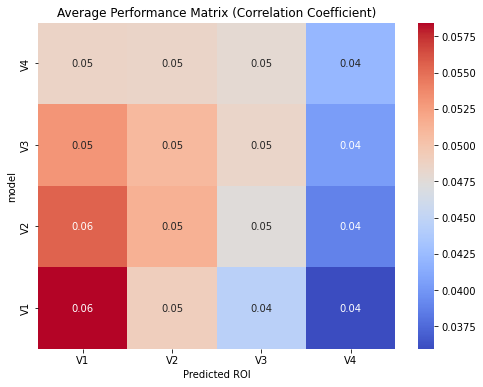

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置横纵坐标的标签
roi_labels = ['V1', 'V2', 'V3', 'V4']

# 创建热图
plt.figure(figsize=(8, 6))
sns.heatmap(final_performance_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=roi_labels, yticklabels=roi_labels[::-1])
plt.title('Average Performance Matrix (Correlation Coefficient)')
plt.xlabel('Predicted ROI')
plt.ylabel('model')
plt.show()
